# This project is to predict the loan payment

## Context
This df set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only **after** they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

## Content
**Loan_id** A unique loan number assigned to each loan customers

**Loan_status** Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

**Principal** Basic principal loan amount at the origination

**terms** Can be weekly (7 days), biweekly, and monthly payoff schedule

**Effective_date** When the loan got originated and took effects

**Due_date** Since it’s one-time payoff schedule, each loan has one single due date

**Paidoff_time** The actual time a customer pays off the loan

**Pastdue_days** How many days a loan has been past due

**Age**, education, gender A customer’s basic demographic information

# Import Libraries

In [99]:
import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Loading Data

In [7]:
df = pd.read_csv('Loan payments data.csv')

In [8]:
df.head(3)

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30       9/8/2016  10/7/2016   
1  xqd20168902     PAIDOFF       1000     30       9/8/2016  10/7/2016   
2  xqd20160003     PAIDOFF       1000     30       9/8/2016  10/7/2016   

     paid_off_time  past_due_days  age             education  Gender  
0  9/14/2016 19:31            NaN   45  High School or Below    male  
1   10/7/2016 9:00            NaN   50              Bechalor  female  
2  9/25/2016 16:58            NaN   33              Bechalor  female

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [10]:
# Run this to Profile df

import pandas_profiling as pp
profile = pp.ProfileReport(df, title="Campus Recruitment Profile", html={"style": {"full_width": True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data contains,

> 400 missing values 
> >     paid_off_time     100
> >     past_due_days     300


# Preprocessing

In [11]:
df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [12]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

Let's look at the unique values of the columns

In [13]:
{column: len(df[column].unique()) for column in df.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [14]:
def binary_encode(df1, column, positive_value):
    df1 = df1.copy()
    df1[column] = df1[column].apply(lambda x: 1 if x == positive_value else 0)
    return df1

def ordinal_encode(df1, column, ordering):
    df1 = df1.copy()
    df1[column] = df1[column].apply(lambda x: ordering.index(x))
    return df1

In [15]:
# Drop Loan_ID column
df = df.drop('Loan_ID', axis=1)
df.head(3)

loan_status  Principal  terms effective_date   due_date    paid_off_time  \
0     PAIDOFF       1000     30       9/8/2016  10/7/2016  9/14/2016 19:31   
1     PAIDOFF       1000     30       9/8/2016  10/7/2016   10/7/2016 9:00   
2     PAIDOFF       1000     30       9/8/2016  10/7/2016  9/25/2016 16:58   

   past_due_days  age             education  Gender  
0            NaN   45  High School or Below    male  
1            NaN   50              Bechalor  female  
2            NaN   33              Bechalor  female

In [16]:
# Create date/time columns
for column in ['effective_date', 'due_date', 'paid_off_time']:
    df[column] = pd.to_datetime(df[column])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     500 non-null    object        
 1   Principal       500 non-null    int64         
 2   terms           500 non-null    int64         
 3   effective_date  500 non-null    datetime64[ns]
 4   due_date        500 non-null    datetime64[ns]
 5   paid_off_time   400 non-null    datetime64[ns]
 6   past_due_days   200 non-null    float64       
 7   age             500 non-null    int64         
 8   education       500 non-null    object        
 9   Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 39.2+ KB


# Data Visualization

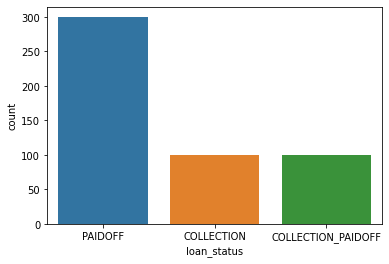

In [18]:
#Visualization process of Loan_Status
sns.countplot(df['loan_status'])
plt.show()

Above Graph shows that nearly 60% of loan are in PAID OFF State while , 20 % are in Collection and 20% are in CollectionPaidOff status

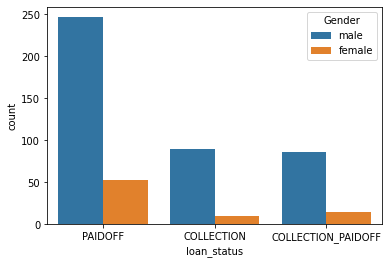

In [19]:
y = sns.countplot(x="loan_status", data=df , hue='Gender')

Above graph shows that Girls have lesser ratio of loans

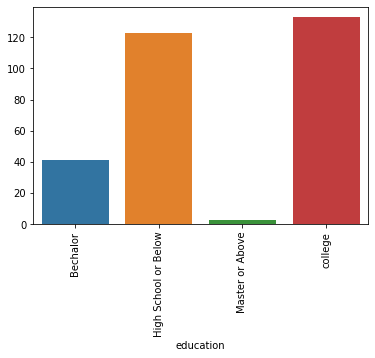

In [20]:
sns.barplot(x=df[df['loan_status']=='PAIDOFF'].groupby('education')['Gender'].count().index,
           y=df[df['loan_status']=='PAIDOFF'].groupby('education')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

Let's see how many people loan applications have been applied for weekly (7 days), Fortnightly (15 Days) , Monthly (30days) payment mode and whats the loan status , how well are weekly, fortnightly and monthly loans are in terms of paid status

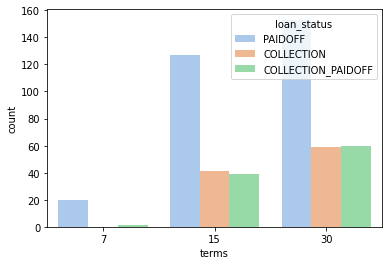

In [21]:
x = sns.countplot(x="terms", data=df , hue='loan_status', palette='pastel', linewidth=5)

From above graph we can see that very few people go for weekly pay off , however fortnighty and monthly payment modes are quiet famous Most of the applications are having monthly mode as people do get monthly wages mostly from where they would like to pay off for the loan amount

.

Lets move further and see how education affects the loan amount and payment status ?

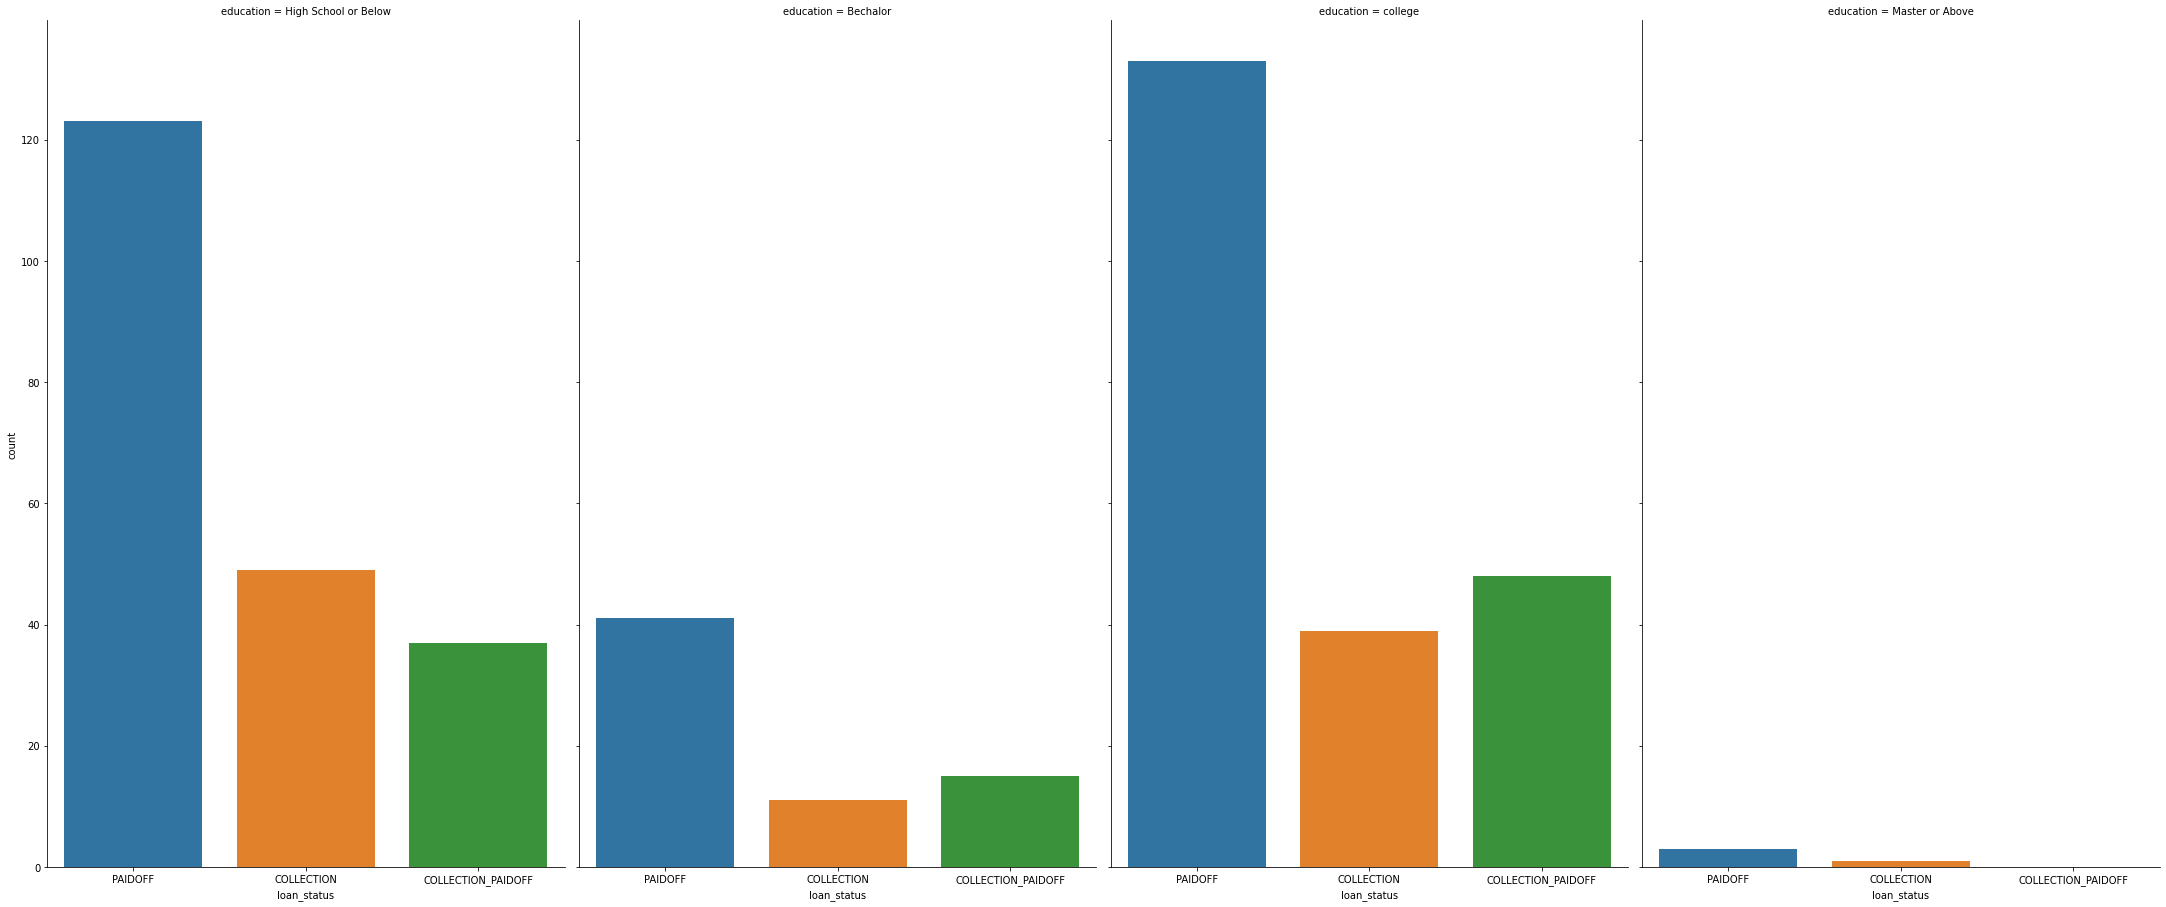

In [22]:
g = sns.catplot("loan_status", col="education", col_wrap=4,
                 data=df[df.loan_status.notnull()],
                 kind="count", height=12.5, aspect=.6)

Above visualisation shows that most of the loans applied in below series

College
High School or below
Bachelor
Master and Above
What this series tells us ?????

Well from above graph we can deduce that most of the college or high school students apply for the loan and pay back well in time so they are better candidates for loans by banks

However for Bachelors degree students - Loan applications are less and return is also not so rewarding means a bit less preferable to return the money by themselves

Lastly - Very few loan applications for students going for Masters and above degree which is a valid insight as very few people (from crowd) opt for masters degree or higher (bit costly than others) so less applicants for loan. Such candidates pay off well and very few people take time to pay back to bank

.

Below visuations is best example as it clearly shows that Male candidates do have more Loan applications compared to Female candidates and most of the canidates who apply for the loan are in higher side of Principal Amount means they wish to go for Better studies

<Figure size 1800x360 with 0 Axes>

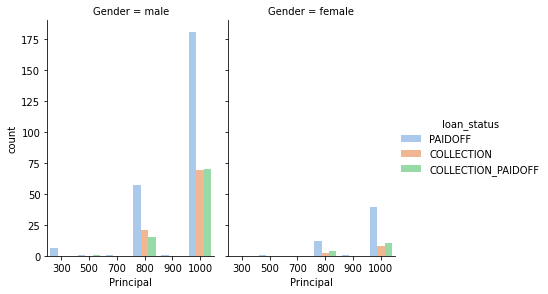

In [23]:
fig = plt.figure(figsize=(25,5))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data=df, kind="count",
                 height=4, aspect=.7);

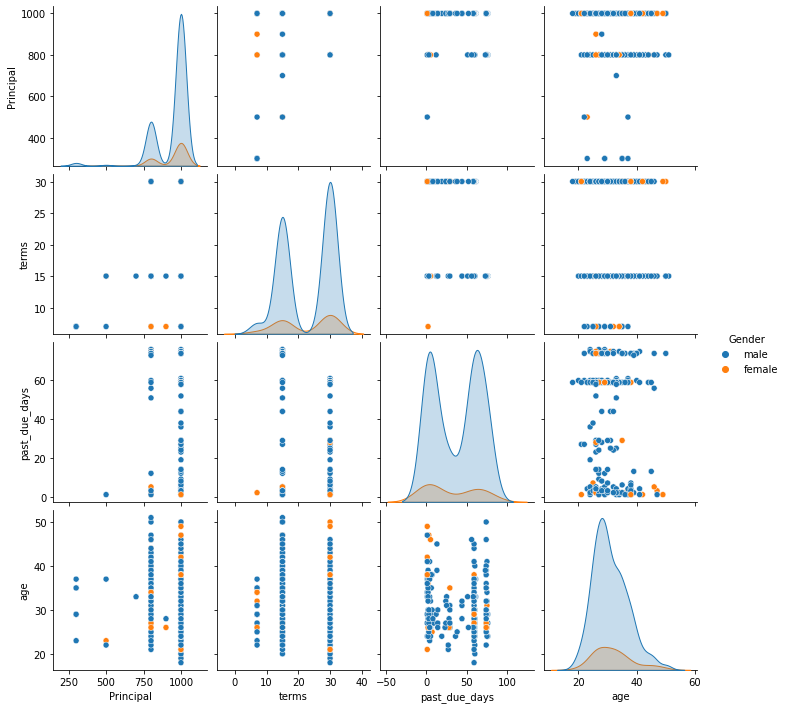

In [24]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(df, hue='Gender')

When we really want to see the spread of the data , Violin plots are one of the good example For example - lets say that we wish to see Principal Amount for which Loan has been applied by Male vs Female candidates based on their age range

If we talk about very first plot of violin in below graph, only Male candidates applied for Principal 400- 500 range

Female candidates apply for Principal amount starting with 800 and apply for most of application having principal amount = 1000

.

From below visualisation we can clearly say that most of the applications are of higher amount 800, 1000 with a very less applications of other amount

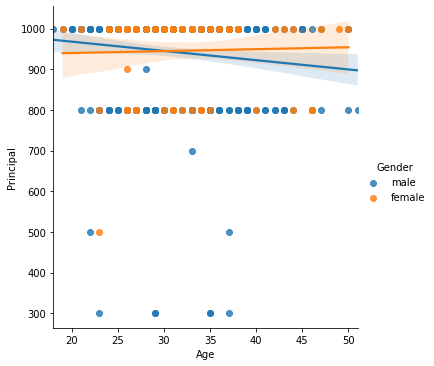

In [25]:
g = sns.lmplot(x="age", y="Principal", hue="Gender",
               truncate=True, height=5, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age", "Principal")

From below visualisation again we can confirm that most of the loan applicants do apply for loan amount as 800 , 1000 ( Seems like most of the people applicants go for higher/better studies for a bright future

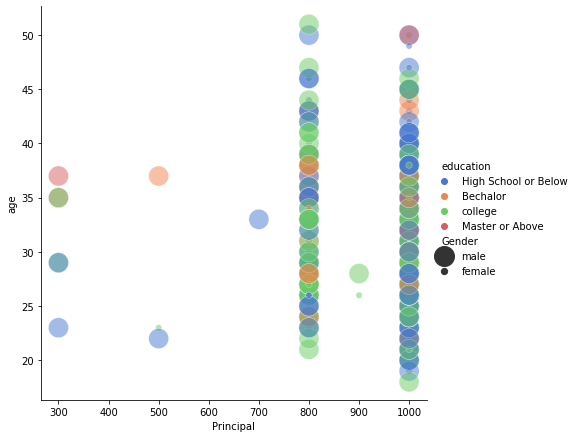

In [26]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Principal", y="age", hue="education",size="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [27]:
defaultPerc=((df.shape[0]-df['past_due_days'].isnull().sum())/df.shape[0])*100
print(defaultPerc,"% of people paid after time")

40.0 % of people paid after time


From below visualisation we can see that 40% people paid loan after due date which is not a good figure we need to work on our loan collection process and streamlining the loan guidelines so that people pay before time rather than being defaulter

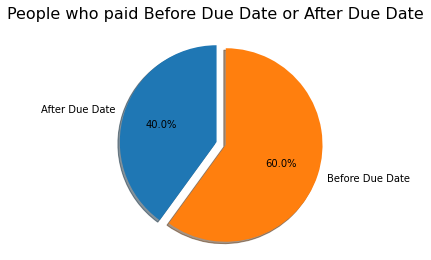

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'After Due Date', 'Before Due Date'
sizes = [defaultPerc,100-defaultPerc]
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.suptitle('People who paid Before Due Date or After Due Date', fontsize=16)


plt.show()

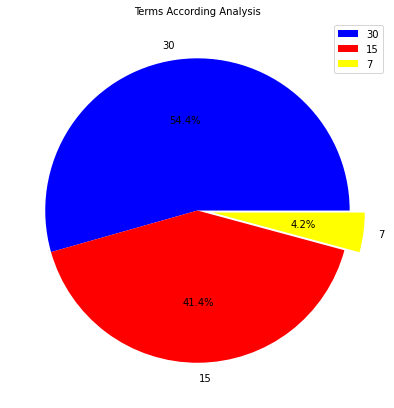

In [29]:
labels=df['terms'].value_counts().index
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=df['terms'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Terms According Analysis',color='black',fontsize=10)
plt.legend()
plt.show()

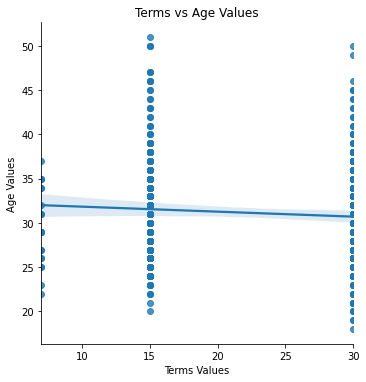

In [30]:
sns.lmplot(x='terms',y='age',data=df)
plt.xlabel('Terms Values')
plt.ylabel('Age Values')
plt.title('Terms vs Age Values')
plt.show()

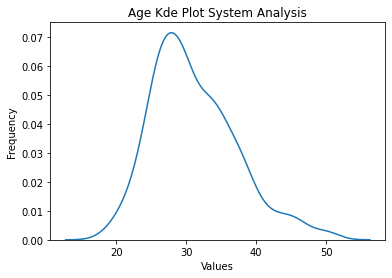

In [31]:
sns.kdeplot(df['age'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')
plt.show()

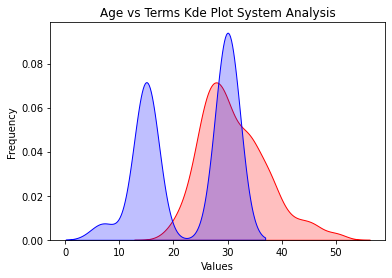

In [32]:
sns.kdeplot(df['age'],shade=True,color='r')
sns.kdeplot(df['terms'],shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age vs Terms Kde Plot System Analysis')
plt.show()

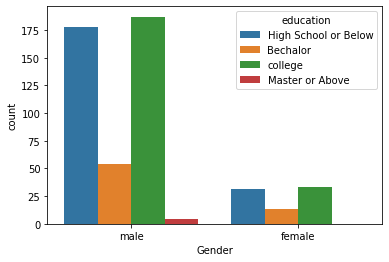

In [33]:
sns.countplot(df['Gender'],hue=df['education'])
plt.show()

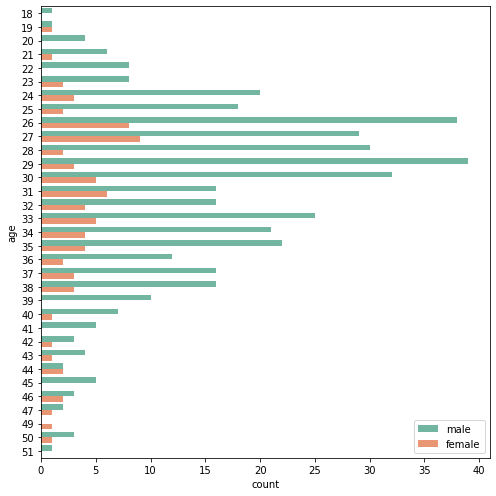

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(y=df['age'],palette="Set2",hue=df['Gender'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

From below visualisation we can clearly see that people going for better education ( College , Masters ) apply for high Principal amount of loan , which is true , better/Higher educations are costly and come with pric

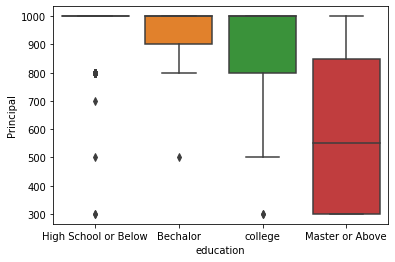

In [35]:
sns.boxplot(x='education', y='Principal', data=df)
plt.show()

Below figure shows some unsual activity of loan applicants on 11 Septembe

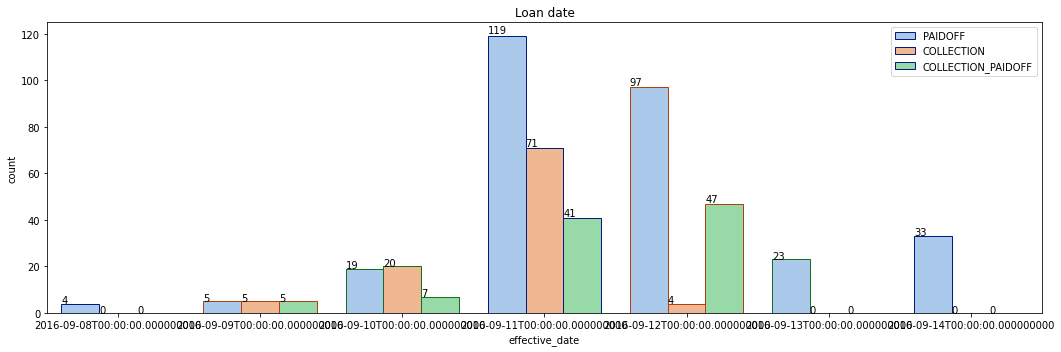

In [36]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="effective_date", hue="loan_status", data=df ,palette='pastel' ,edgecolor=sns.color_palette("dark", 3))
ax.set_title('Loan date')
ax.legend(loc='upper right')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.tight_layout()
plt.show();

People going for higher studies apply for loan with Principal Amount of 800 , 1000  
Male candidates apply wide variety of loans  
40% of people applying for loans to this (xyz) bank are defaulters whcih means bank need to work on their policies and recovering rules  

# Feature Engenireeng

In [37]:
df['effective_day'] = df['effective_date'].apply(lambda x: x.day)

df['due_month'] = df['due_date'].apply(lambda x: x.month)
df['due_day'] = df['due_date'].apply(lambda x: x.day)

df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)

df = df.drop(['effective_date', 'due_date', 'paid_off_time'], axis=1)

In [38]:
df.head(3)

loan_status  Principal  terms  past_due_days  age             education  \
0     PAIDOFF       1000     30            NaN   45  High School or Below   
1     PAIDOFF       1000     30            NaN   50              Bechalor   
2     PAIDOFF       1000     30            NaN   33              Bechalor   

   Gender  effective_day  due_month  due_day  paid_off_month  paid_off_day  \
0    male              8         10        7             9.0          14.0   
1  female              8         10        7            10.0           7.0   
2  female              8         10        7             9.0          25.0   

   paid_off_hour  
0           19.0  
1            9.0  
2           16.0

In [39]:
# Fill missing values with column means
for column in ['past_due_days', 'paid_off_month', 'paid_off_day', 'paid_off_hour']:
    df[column] = df[column].fillna(df[column].mean())

In [40]:
df['Gender']

0        male
1      female
2      female
3        male
4      female
        ...  
495      male
496      male
497      male
498    female
499      male
Name: Gender, Length: 500, dtype: object

In [41]:
# Binary encode the Gender column
df = binary_encode(df, 'Gender', positive_value='male')

In [42]:
df['Gender']

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Gender, Length: 500, dtype: int64

In [43]:
df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [44]:
# Ordinal encode the education column
education_ordering = [
    'High School or Below',
    'college',
    'Bechalor',
    'Master or Above'
]
df = ordinal_encode(df, 'education', ordering=education_ordering)

In [45]:
df['education'].unique()

array([0, 2, 1, 3])

In [46]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [47]:
# Encode the label (loan_status) column
label_mapping = {'COLLECTION': 0, 'PAIDOFF': 1, 'COLLECTION_PAIDOFF': 2}
df['loan_status'] = df['loan_status'].replace(label_mapping)

In [48]:
# Split df into X and y
y = df['loan_status'].copy()
X = df.drop('loan_status', axis=1).copy()

In [49]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    2
496    2
497    2
498    2
499    2
Name: loan_status, Length: 500, dtype: int64

In [50]:
X

Principal  terms  past_due_days  age  education  Gender  effective_day  \
0         1000     30          36.01   45          0       1              8   
1         1000     30          36.01   50          2       0              8   
2         1000     30          36.01   33          2       0              8   
3         1000     15          36.01   27          1       1              8   
4         1000     30          36.01   28          1       0              9   
..         ...    ...            ...  ...        ...     ...            ...   
495       1000     30           3.00   28          0       1             12   
496       1000     15          14.00   26          0       1             12   
497        800     15           3.00   30          1       1             12   
498       1000     30           1.00   38          1       0             12   
499       1000     30           8.00   28          0       1             12   

     due_month  due_day  paid_off_month  paid_off_day  paid_off_hour  
0           10        7             9.0          14.0           19.0  
1           10        7            10.0           7.0            9.0  
2           10        7             9.0          25.0           16.0  
3            9       22             9.0          22.0           20.0  
4           10        8             9.0          23.0           21.0  
..         ...      ...             ...           ...            ...  
495         10       11            10.0          14.0           19.0  
496          9       26            10.0          10.0           20.0  
497          9       26             9.0          29.0           11.0  
498         11       10            11.0          11.0           22.0  
499         10       11            10.0          19.0           11.0  

[500 rows x 12 columns]

In [51]:
# Scale X with a standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
X

Principal     terms  past_due_days       age  education    Gender  \
0     0.493377  0.897891       0.000000  2.284043  -1.022825  0.426653   
1     0.493377  0.897891       0.000000  3.106587   1.771779 -2.343823   
2     0.493377  0.897891       0.000000  0.309935   1.771779 -2.343823   
3     0.493377 -0.978972       0.000000 -0.677119   0.374477  0.426653   
4     0.493377  0.897891       0.000000 -0.512610   0.374477 -2.343823   
..         ...       ...            ...       ...        ...       ...   
495   0.493377  0.897891      -1.780899 -0.512610  -1.022825  0.426653   
496   0.493377 -0.978972      -1.187446 -0.841628  -1.022825  0.426653   
497  -1.243866 -0.978972      -1.780899 -0.183592   0.374477  0.426653   
498   0.493377  0.897891      -1.888799  1.132480   0.374477 -2.343823   
499   0.493377  0.897891      -1.511147 -0.512610  -1.022825  0.426653   

     effective_day  due_month   due_day  paid_off_month  paid_off_day  \
0        -3.126073   0.664986 -1.303142       -1.035098     -0.463997   
1        -3.126073   0.664986 -1.303142        0.690066     -1.475829   
2        -3.126073   0.664986 -1.303142       -1.035098      1.126025   
3        -3.126073  -1.094236  0.724148       -1.035098      0.692382   
4        -2.209336   0.664986 -1.167989       -1.035098      0.836930   
..             ...        ...       ...             ...           ...   
495       0.540875   0.664986 -0.762531        0.690066     -0.463997   
496       0.540875  -1.094236  1.264758        0.690066     -1.042187   
497       0.540875  -1.094236  1.264758       -1.035098      1.704214   
498       0.540875   2.424209 -0.897684        2.415229     -0.897640   
499       0.540875   0.664986 -0.762531        0.690066      0.258740   

     paid_off_hour  
0         1.339835  
1        -1.072109  
2         0.616252  
3         1.581030  
4         1.822224  
..             ...  
495       1.339835  
496       1.581030  
497      -0.589721  
498       2.063419  
499      -0.589721  

[500 rows x 12 columns]

 # Models

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

Confusion matrix of Logistic Regression
[[30  2  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 0.9866666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.98      1.00      0.99        91
           2       1.00      1.00      1.00        27

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150

Jaccard similarity score: 0.973620071684588
Type II Error: 0.0
ROC AUC Score: 0.9998137455764574


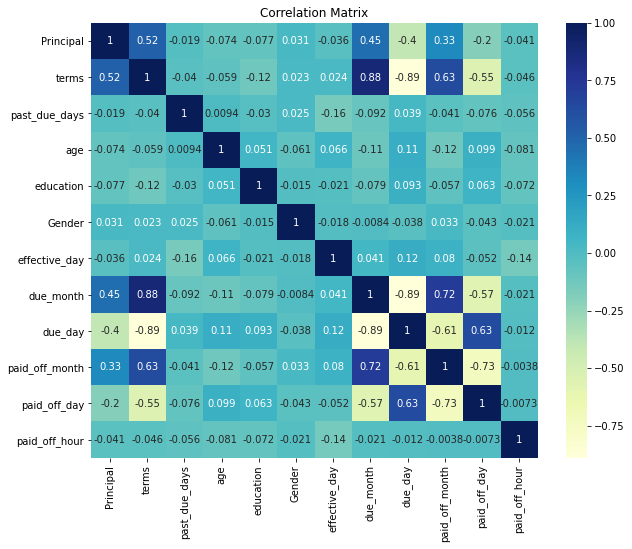

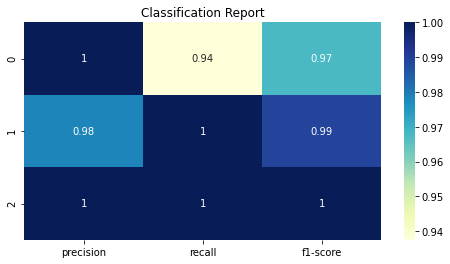

Confusion matrix of Stochastic Gradient Descent
[[30  2  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 0.9866666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.98      1.00      0.99        91
           2       1.00      1.00      1.00        27

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150

Jaccard similarity score: 0.973620071684588
Type II Error: 0.0
ROC AUC Score: 1.0


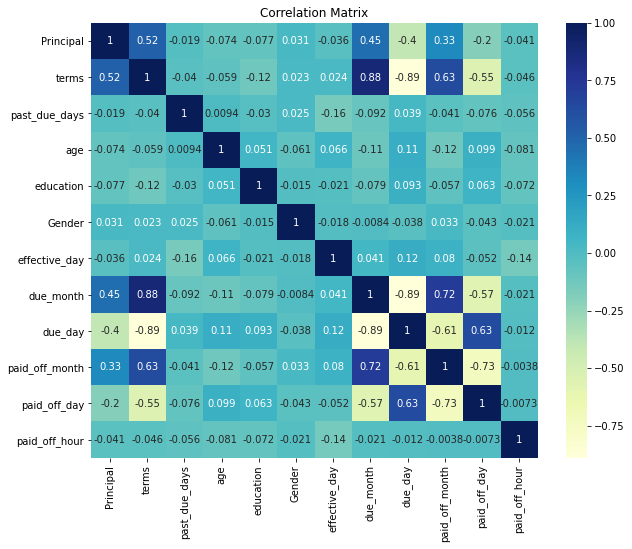

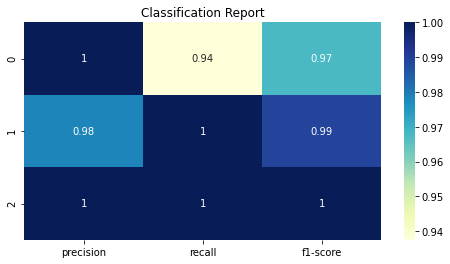

Confusion matrix of Decision Tree
[[32  0  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Jaccard similarity score: 1.0
Type II Error: 0.0
ROC AUC Score: 1.0


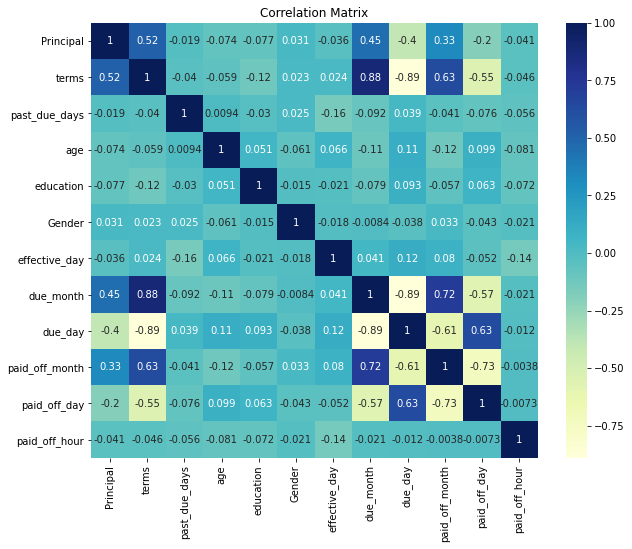

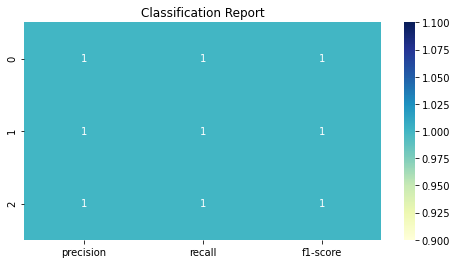

Confusion matrix of Optimal Classification Tree
[[32  0  0]
 [ 0 88  3]
 [ 0  0 27]]
Accuracy score is 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.97      0.98        91
           2       0.90      1.00      0.95        27

    accuracy                           0.98       150
   macro avg       0.97      0.99      0.98       150
weighted avg       0.98      0.98      0.98       150

Jaccard similarity score: 0.9620000000000001
Type II Error: 0.0
ROC AUC Score: 0.990440453855088


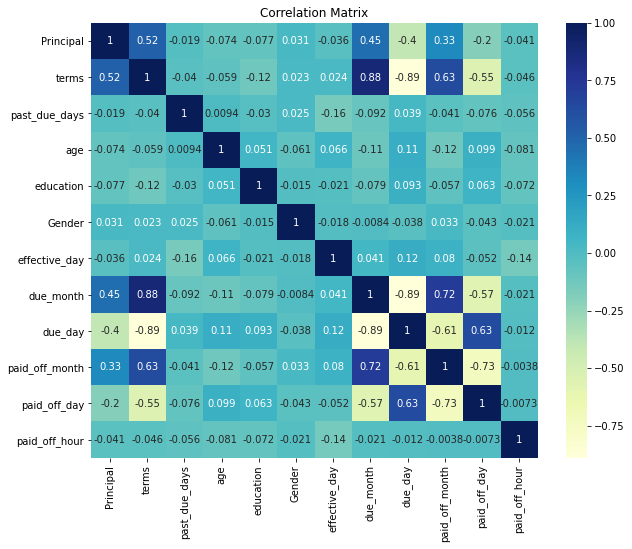

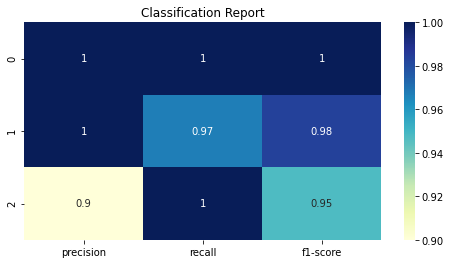

Confusion matrix of Neural Network
[[32  0  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Jaccard similarity score: 1.0
Type II Error: 0.0
ROC AUC Score: 1.0


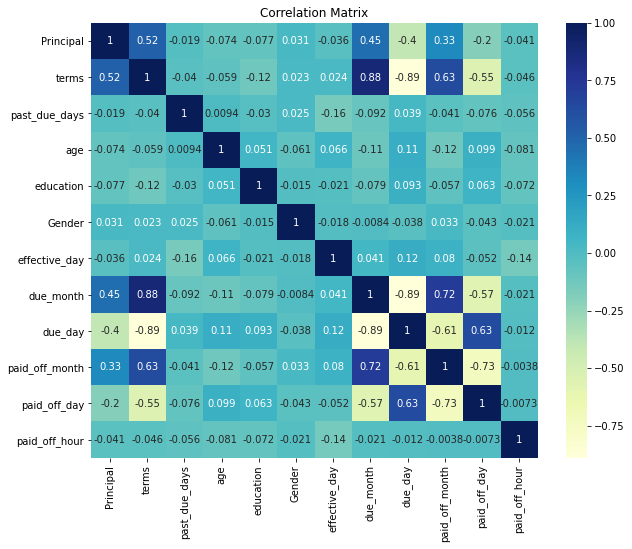

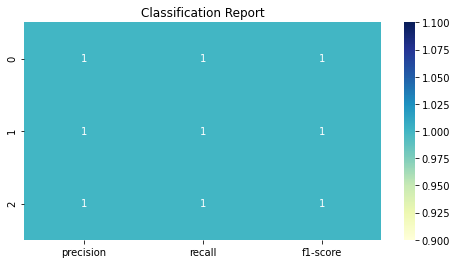

Confusion matrix of Random Forest
[[32  0  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Jaccard similarity score: 1.0
Type II Error: 0.0
ROC AUC Score: 1.0


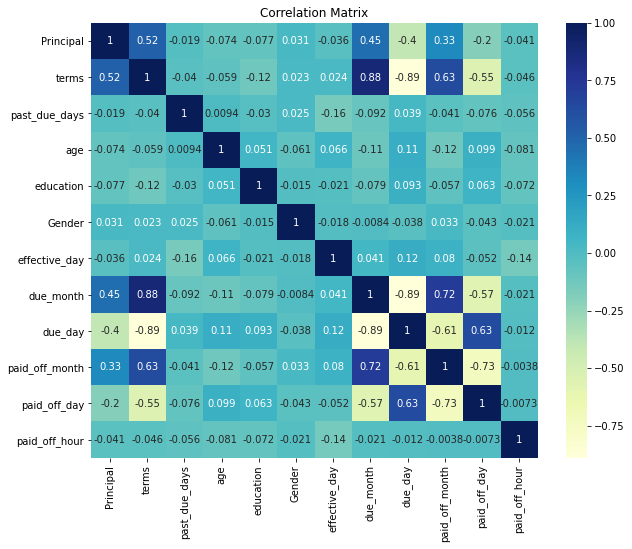

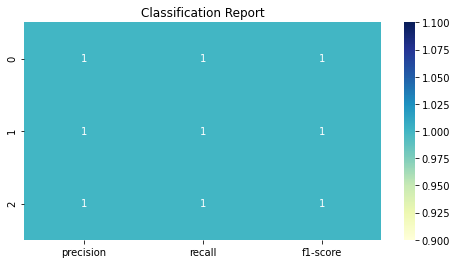

[11:34:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix of XGBoost
[[32  0  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Jaccard similarity score: 1.0
Type II Error: 0.0
ROC AUC Score: 1.0


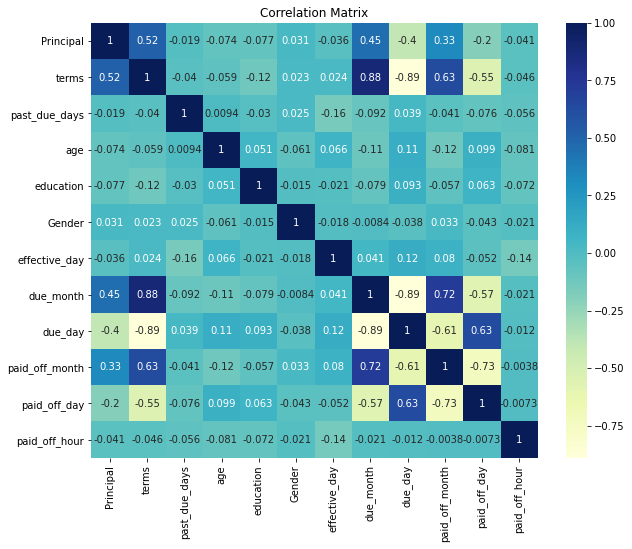

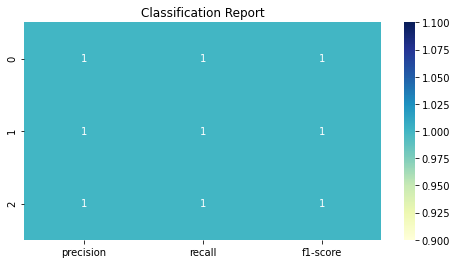

Confusion matrix of GaussianNB
[[32  0  0]
 [ 0 91  0]
 [ 0  0 27]]
Accuracy score is 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        27

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Jaccard similarity score: 1.0
Type II Error: 0.0
ROC AUC Score: 1.0


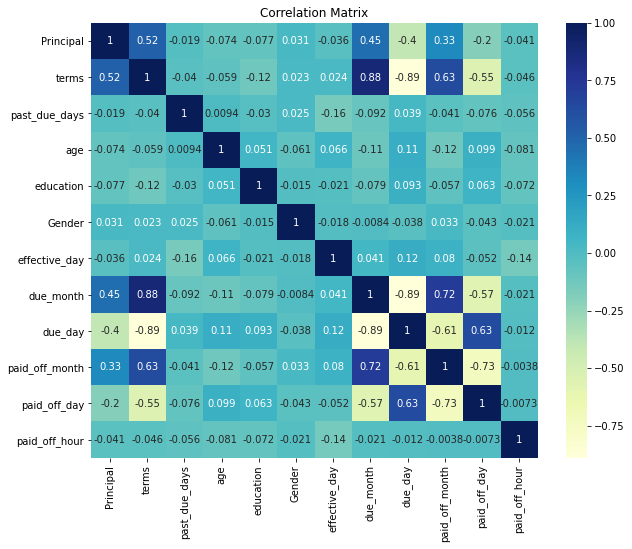

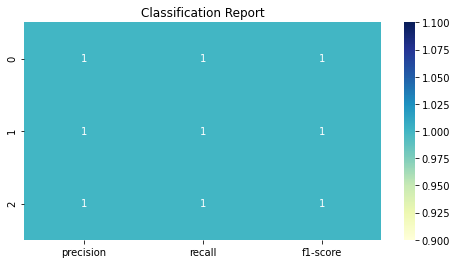

Confusion matrix of KNeighborsClassifier
[[32  0  0]
 [ 2 88  1]
 [ 1  8 18]]
Accuracy score is 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.92      0.97      0.94        91
           2       0.95      0.67      0.78        27

    accuracy                           0.92       150
   macro avg       0.93      0.88      0.89       150
weighted avg       0.92      0.92      0.92       150

Jaccard similarity score: 0.850021164021164
Type II Error: 0.022222222222222223
ROC AUC Score: 0.9832760161774389


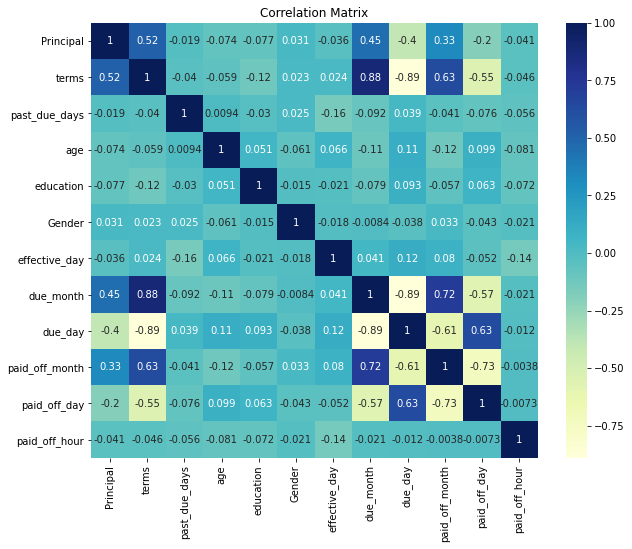

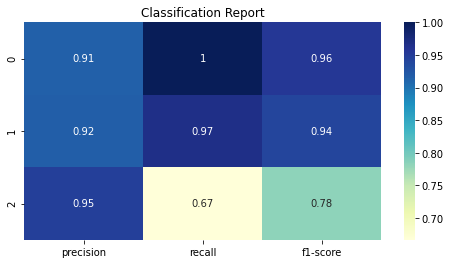

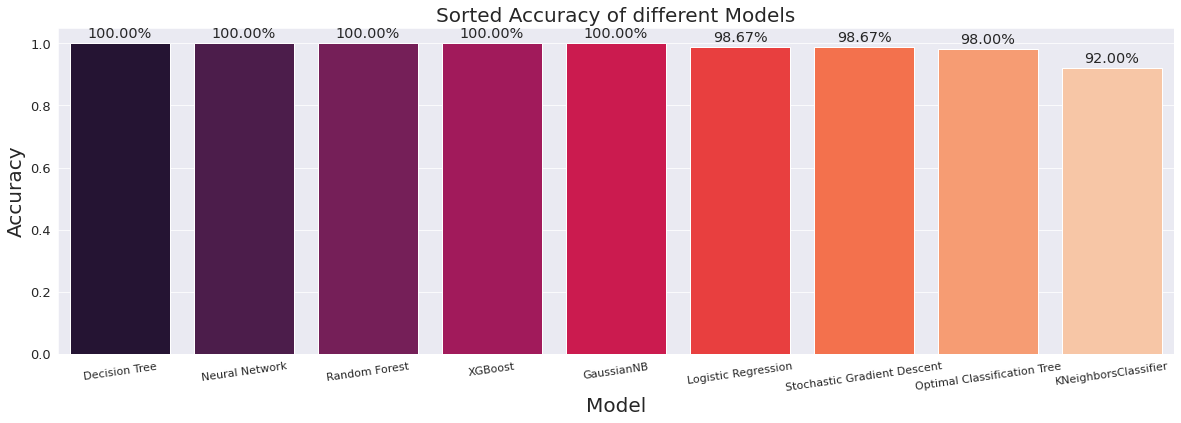

In [54]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score

names = [
    "Logistic Regression",
    "Stochastic Gradient Descent",
    "Decision Tree",
    "Optimal Classification Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    LogisticRegression(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

accuracy = []
classification_reports = []
roc_auc_scores = []
type_2_errors = []
jaccard_scores = []

for model, name in zip(models, names):
    if name == "Stochastic Gradient Descent":
        # Set loss='log' for SGD classifier to enable probability estimation
        model.set_params(loss='log')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of', name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is', ac)
    accuracy.append(ac)
    print('='*50)

    cr = classification_report(y_test, y_pred)
    classification_reports.append(cr)
    print('Classification Report:')
    print(cr)
    print('='*50)

    # Jaccard similarity score
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    jaccard_scores.append(jaccard)
    print('Jaccard similarity score:', jaccard)
    print('='*50)
    
    # Type II error
    cm = confusion_matrix(y_test, y_pred)
    type_2_error = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    type_2_errors.append(type_2_error)
    print('Type II Error:', type_2_error)
    print('='*50)

    # ROC AUC score (OvR)
    if len(np.unique(y_test)) > 2:
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
        else:
            raise AttributeError("Probability estimates are not available for the model.")
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append(roc_auc)
    print('ROC AUC Score:', roc_auc)
    print('='*50)
    
    # Correlation matrix
    corr_matrix = pd.DataFrame(X_train).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix")
    plt.show()

    # Classification report plot
    report_data = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_data).transpose()
    report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
    plt.figure(figsize=(8, 4))
    sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap="YlGnBu")
    plt.title("Classification Report")
    plt.show()

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)), columns=['Model', 'Accuracy'])
Accuracy_list = Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True)

plt.rcParams['figure.figsize'] = 20, 6 
sns.set_style("darkgrid")
ax = sns.barplot(x='Model', y='Accuracy', data=Accuracy_list, palette="rocket", saturation=1.5)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Sorted Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')
plt.show()


In [59]:
import shap
shap_explanations = []
def check_shap(model):
        model.fit(X_train, y_train)
        try:
            # Skip SGDClassifier for SHAP analysis
            if isinstance(model, SGDClassifier):
                raise Exception("Skipping SGDClassifier for SHAP analysis.")

            # SHAP explanations
            explainer = shap.KernelExplainer(model.predict_proba, X_train)
            shap_values = explainer.shap_values(X_test)
            shap_explanations.append(shap_values)
        except Exception as e:
            print(f"Error occurred for {model}: {str(e)}")

In [60]:
# Shap for LogisticRegression
check_shap(LogisticRegression())

  0%|          | 0/150 [00:00<?, ?it/s]

In [62]:
# Shap for DecisionTreeClassifier
check_shap(DecisionTreeClassifier())

  0%|          | 0/150 [00:00<?, ?it/s]

In [65]:
# Shap for ExtraTreeClassifier
check_shap(ExtraTreeClassifier())

  0%|          | 0/150 [00:00<?, ?it/s]

In [67]:
# Shap for MLPClassifier
check_shap(MLPClassifier())

  0%|          | 0/150 [00:00<?, ?it/s]

In [69]:
# Shap for RandomForestClassifier
check_shap(RandomForestClassifier())

  0%|          | 0/150 [00:00<?, ?it/s]

In [71]:
# Shap for XGBClassifier
check_shap(XGBClassifier())

[14:21:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  0%|          | 0/150 [00:00<?, ?it/s]

In [73]:
# Shap for GaussianNB
check_shap(GaussianNB())

  0%|          | 0/150 [00:00<?, ?it/s]

In [75]:
# Shap for KNeighborsClassifier
check_shap(KNeighborsClassifier())

  0%|          | 0/150 [00:00<?, ?it/s]

In [76]:
len(shap_explanations)

8

In [ ]:
# so I didn't have to wait for the results every time, 
# I saved the first results. Let's just open it up for an example

# shap_values = pd.read_csv('shap_values.csv')
# shap_explanations = pd.read_csv('shap_explanations.csv')

Plotting graphs for Logistic Regression
Plotting SHAP values for Logistic Regression


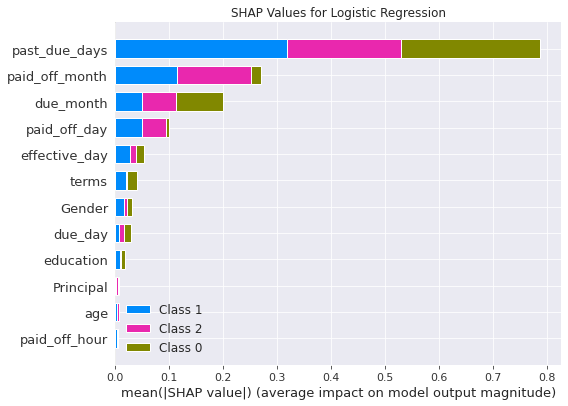

Plotting graphs for Stochastic Gradient Descent
Plotting SHAP values for Stochastic Gradient Descent


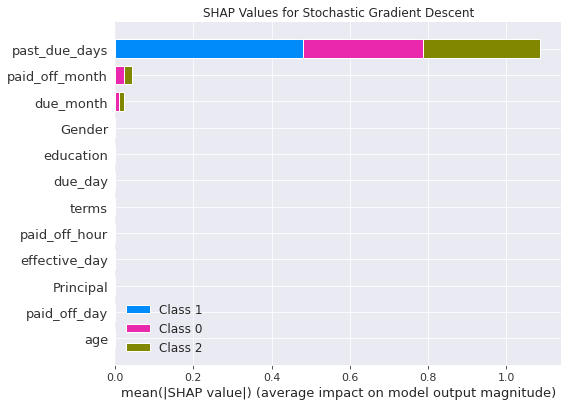

Plotting graphs for Decision Tree


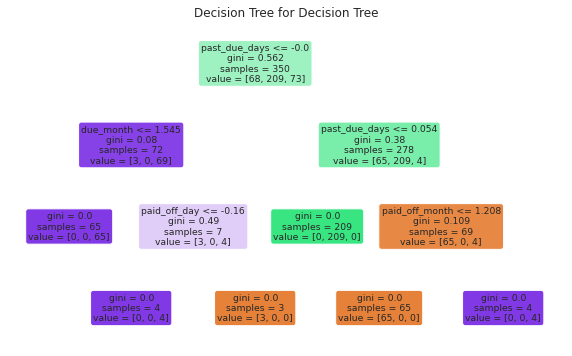

Plotting SHAP values for Decision Tree


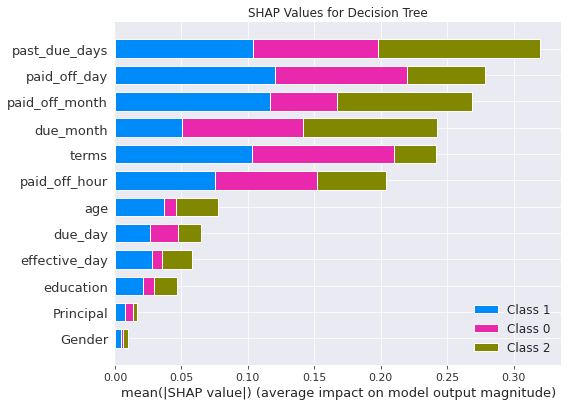

Plotting graphs for Optimal Classification Tree


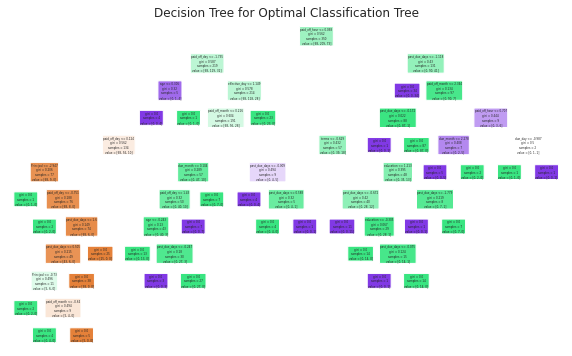

Plotting SHAP values for Optimal Classification Tree


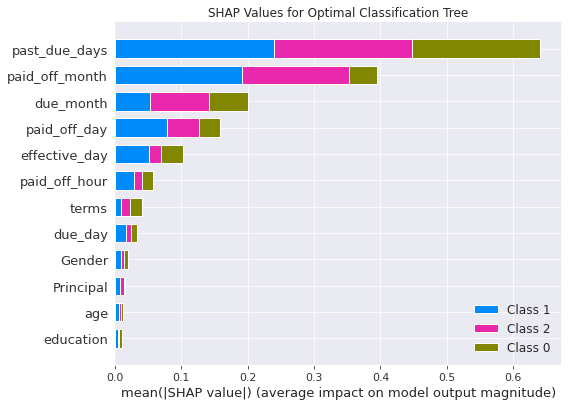

Plotting graphs for Neural Network
Plotting SHAP values for Neural Network


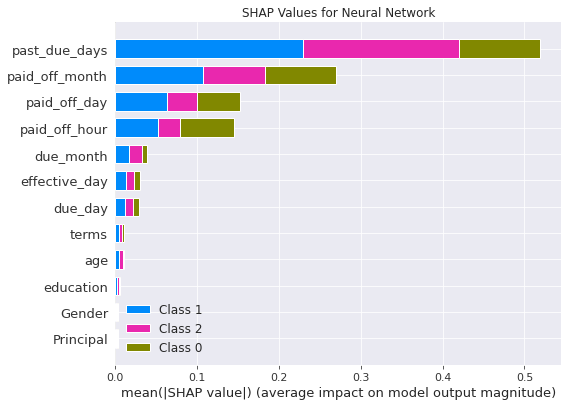

Plotting graphs for Random Forest
Plotting SHAP values for Random Forest


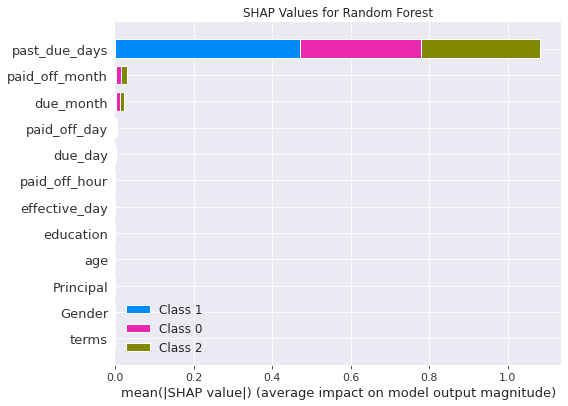

Plotting graphs for XGBoost
Plotting SHAP values for XGBoost


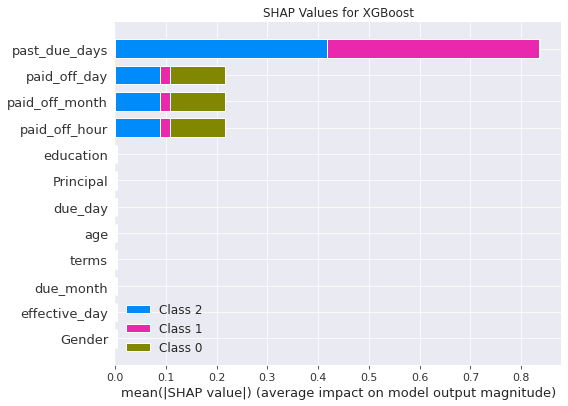

Plotting graphs for GaussianNB
Plotting SHAP values for GaussianNB


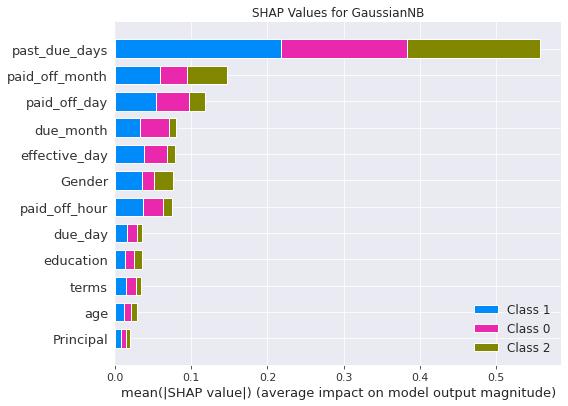

In [94]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming you have already computed the SHAP values in the `shap_explanations` list

for model, name, shap_values in zip(models, names, shap_explanations):
    print(f"Plotting graphs for {name}")

    # Decision Tree graph
    if isinstance(model, DecisionTreeClassifier):
        model.fit(X_train, y_train)  # Fit the model with appropriate training data
        plt.figure(figsize=(10, 6))
        plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
        plt.title(f"Decision Tree for {name}")
        plt.show()

    # Plot SHAP values
    print(f"Plotting SHAP values for {name}")
    shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
    plt.title(f"SHAP Values for {name}")
    plt.show()


In [95]:
for name, shap_values in zip(names, shap_explanations):
    if name == "Stochastic Gradient Descent":
        continue
    else:
        print(f"SHAP values for {name}:")
        print(shap_values)
        print("=" * 50)

SHAP values for Logistic Regression:
[array([[-3.86298963e-03,  1.85841698e-02, -1.34329702e-01, ...,
         2.47158007e-02,  7.74214382e-03, -5.56381732e-04],
       [ 2.88978110e-03, -2.52127084e-02,  6.02361906e-01, ...,
         1.92582753e-03, -1.75966703e-05, -3.80083805e-04],
       [ 3.41789057e-03, -3.88624779e-02, -2.26345579e-01, ...,
         2.88077104e-03, -7.58757559e-04,  2.01078357e-04],
       ...,
       [ 8.47693203e-04,  1.98863094e-02,  7.98843907e-01, ...,
         6.96857019e-03,  1.26356702e-03, -1.02234762e-03],
       [ 5.43391815e-04, -5.31706228e-03, -1.85241088e-01, ...,
        -5.66289630e-03, -3.36630387e-03,  8.04461928e-04],
       [ 6.31165655e-04, -5.93231797e-03, -1.97261839e-01, ...,
        -6.42143886e-03, -1.61262378e-03, -1.50707436e-04]]), array([[-1.64130767e-03, -2.07667065e-02,  2.53565113e-01, ...,
         1.62877356e-01, -6.34589589e-02,  4.52775261e-03],
       [-1.91097559e-03,  2.65132979e-02, -4.19638210e-01, ...,
         1.01093

Plotting SHAP values for Logistic Regression


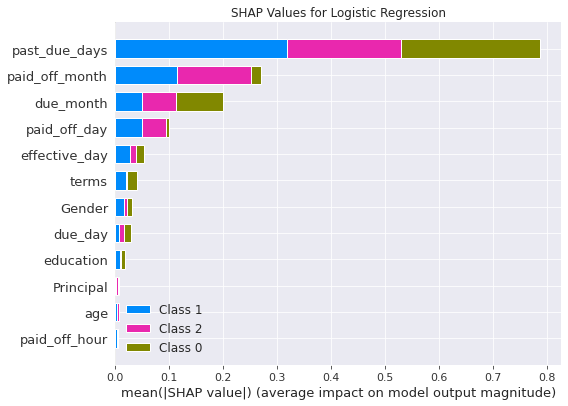

Plotting SHAP values for Decision Tree


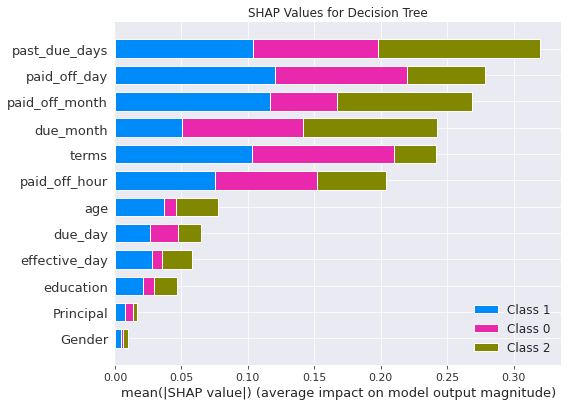

Plotting SHAP values for Optimal Classification Tree


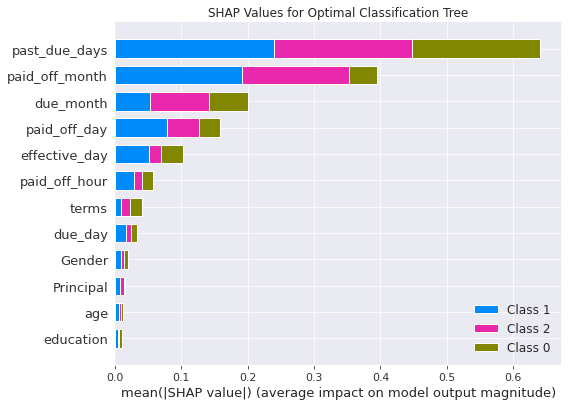

Plotting SHAP values for Neural Network


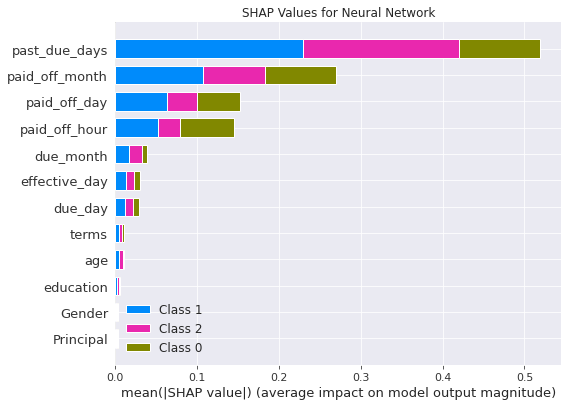

Plotting SHAP values for Random Forest


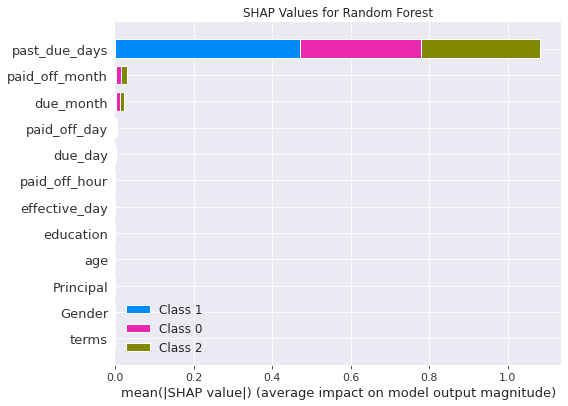

Plotting SHAP values for XGBoost


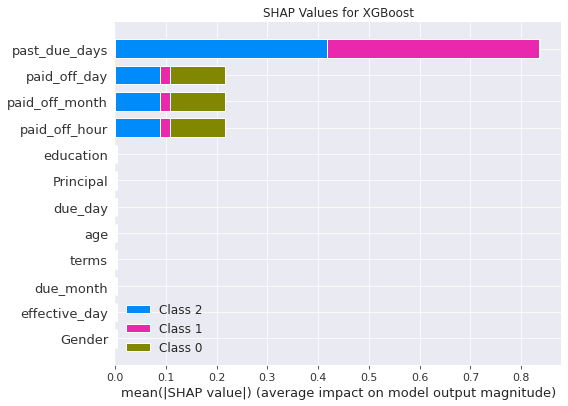

Plotting SHAP values for GaussianNB


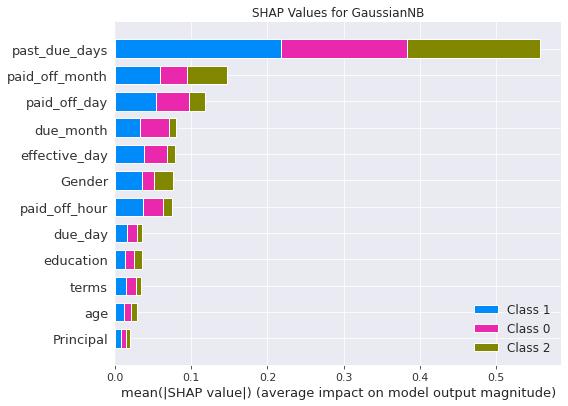

In [97]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already computed the SHAP values in the `shap_explanations` list

# Plot SHAP values for each algorithm
for name, shap_values in zip(names, shap_explanations):
    if name == 'Stochastic Gradient Descent':
        continue
    else:
        print(f"Plotting SHAP values for {name}")
        shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
        plt.title(f"SHAP Values for {name}")
        plt.show()


It seems that the SGDClassifier with loss='hinge' does not support probability estimates, which is required for SHAP analysis. In this case, we can exclude the SGDClassifier from the SHAP analysis.